In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 6
sns.set_style('darkgrid')

In [38]:
## Importing Dataset
df = pd.read_csv("training.csv")
df.head()
df

,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,30087,1441088.593,978921.8705,1432758.032,979984.5869,1050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29688,30088,1513299.189,976157.4486,1519890.072,975148.4820,1159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29689,30089,1458652.142,972862.2346,1453129.889,973195.0998,1050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29690,30090,1463417.436,972485.8276,1468807.765,971564.9743,1153,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.columns
#'surface_x', 'surface_y', 'bh_x', 'bh_y'

Index(['Unnamed: 0', 'surface_x', 'surface_y', 'bh_x', 'bh_y',
       'standardized_operator_name', 'gross_perforated_length',
       'number_of_stages', 'total_proppant', 'total_fluid',
       'true_vertical_depth', 'ffs_frac_type', 'proppant_intensity',
       'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship', 'frac_type',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

In [40]:
df['midpoint to toe distance multiplied by 2'] = (((df['horizontal_midpoint_x']-df['horizontal_toe_x'])**2+(df['horizontal_midpoint_y']-df['horizontal_toe_y'])**2)**0.5) *2
df['midpoint to toe distance multiplied by 2']

0        4060.834657
1        3336.100414
2        3785.716551
3        3990.807940
4        4043.350789
            ...     
29687            NaN
29688            NaN
29689            NaN
29690            NaN
29691            NaN
Name: midpoint to toe distance multiplied by 2, Length: 29692, dtype: float64

In [41]:
df ['bin_lateral_length']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
29687    NaN
29688    NaN
29689    NaN
29690    NaN
29691    NaN
Name: bin_lateral_length, Length: 29692, dtype: float64

In [42]:
df['bin_lateral_length'].unique()

array([1. , nan, 0. , 1.5, 2. , 2.5, 3. ])

In [43]:
df['bin_lateral_length'].isna().sum()

7557

In [44]:
df['relative_well_position'].unique()

array(['Standalone Well', 'Outer Well', 'Inner Well', nan, 'Unknown'],
      dtype=object)

In [45]:
df['standardized_operator_name'].unique().sum()

412465

In [46]:
df['well_family_relationship'].unique()

array(['Standalone Well', 'Infill Child Well', 'Sibling Well', nan,
       'Unknown'], dtype=object)

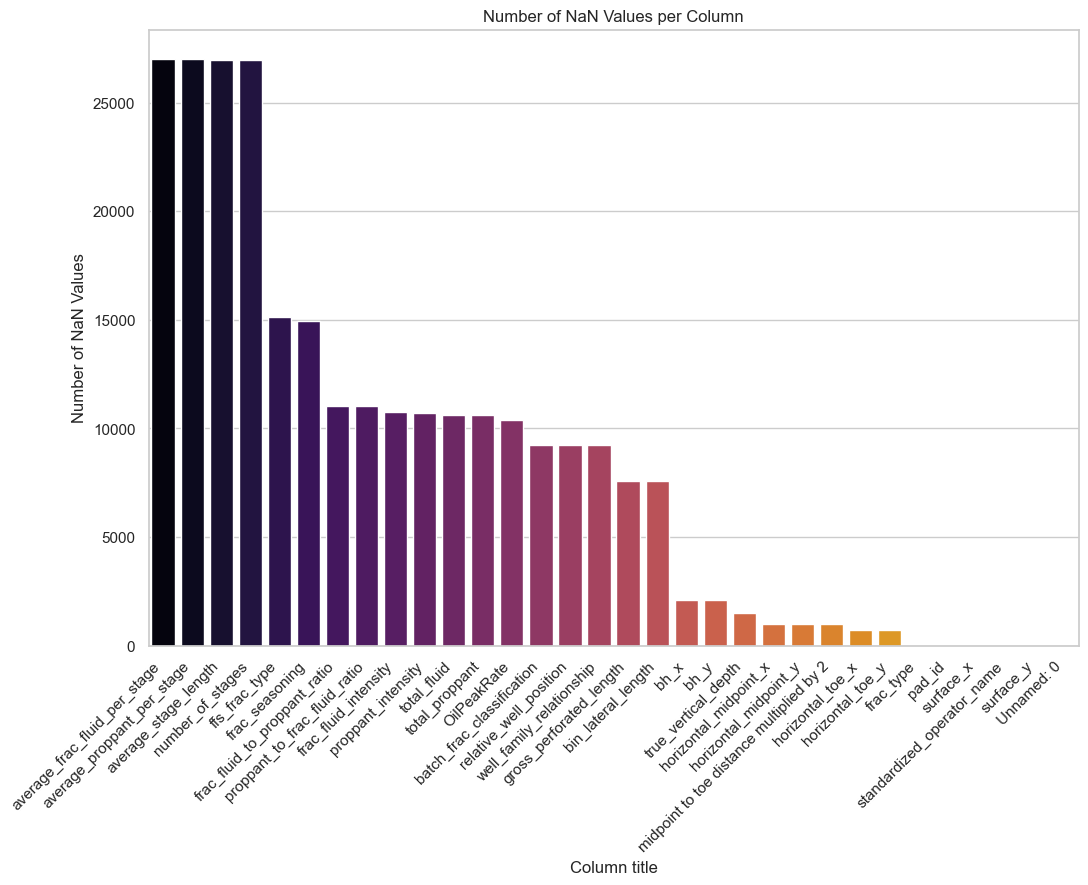

In [68]:
# Calculate the number of NaN values per column with raw data and sort descending order
sorted_nans_per_column = (df.isna().sum()).sort_values(ascending=False)

# Create a bar plot using Seaborn 
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Define x, y, and palette
nanplt = sns.barplot(x=sorted_nans_per_column.index, y=sorted_nans_per_column.values, palette="inferno")

# Set labels
nanplt.set(xlabel='Column title', ylabel='Number of NaN Values', title='Number of NaN Values per Column')

# Align titles 45 degrees to the right
plt.xticks(rotation=45, ha='right')
plt.show()